# Авиапассажиры

## 1. Описание задачи
Моя задача заключается в измерении удовлетворённости пассажиров авиакомпаний. Используя выбранный набор данных необходимо путём машинного обучения спрогнознозировать, будет ли удовлетворён клиент качеством услуг авиаперелёта на основе его данных полученных из опроса о работе компании.
<br> Данный датасет содержит следующие признаки:
1. Gender- пол клиента.
2. customer_type - тип клиента.
3. age - возраст клиента.
4. type_of_travel - тип путешествия.
5. customer_class - клиентский класс.
6. flight_distance - расстояние полёта.
7. inflight_wifi_service - доступность wi-fi  в самолёте.
8. departure_arrival_time_convenient - удовлетворённость временем прибытия/отбытия.
9. ease_of_online_booking - простота онлайн бронирования.
10. gate_location -удобство расположение выхода на посадку.
11. food_and_drink - удовлетворённость питанием.
12. online_boarding - удовлетворённость онлайн регистрации.
13. seat_comfort - уровень комфорта сидений в самолёте.
14. inflight_entertainment - уровень развлечений на борту самолёта.
15. onboard_service - уровень обслуживания на борту.
16. leg_room_service - удобство места для ног.
17. baggage_handling - уровень ображения с багажом.
18. checkin_service - уровень усглуги регистрации.
19. inflight_service - уровень обслуживания в полёте.
20. cleanliness - уровень чистоты.
21. departure_delay_in_minutes - задержка оптравления в минутах.
22. arrival_delay_in_minutes - задержка прибытия в минутах.
23. satisfaction - удовлетворённость.

### 2. Чтение данных
Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/1fNtSauIUyV2r-xXVo1th02S8Qhj50n5x/view?usp=sharing"

id = link.split("/")[-2]

downloaded = drive.CreateFile({"id":id})
downloaded.GetContentFile("train.csv")

data_raw = pd.read_csv("train.csv")

Загрузка датасета

## 3. Визуализация данных и вычисление основных характеристик

In [ ]:
data_raw.shape

(129880, 24)

In [ ]:
data_raw

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [ ]:
data_raw.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
data_raw.describe(include = ['object'])

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


Приведём тип категориальных признаков от типа 'object' к типу 'category'

In [ ]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['type_of_travel'] = data_raw['type_of_travel'].astype('category')
data_raw['customer_class'] = data_raw['customer_class'].astype('category')
data_raw['satisfaction'] = data_raw['satisfaction'].astype('category')

# Сначала удалим первый столбец и обозначающий номер строки.

In [ ]:
data_raw.pop('Unnamed: 0');
data_raw.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Построение диаграмм рассеивания для каждой пары переменных:

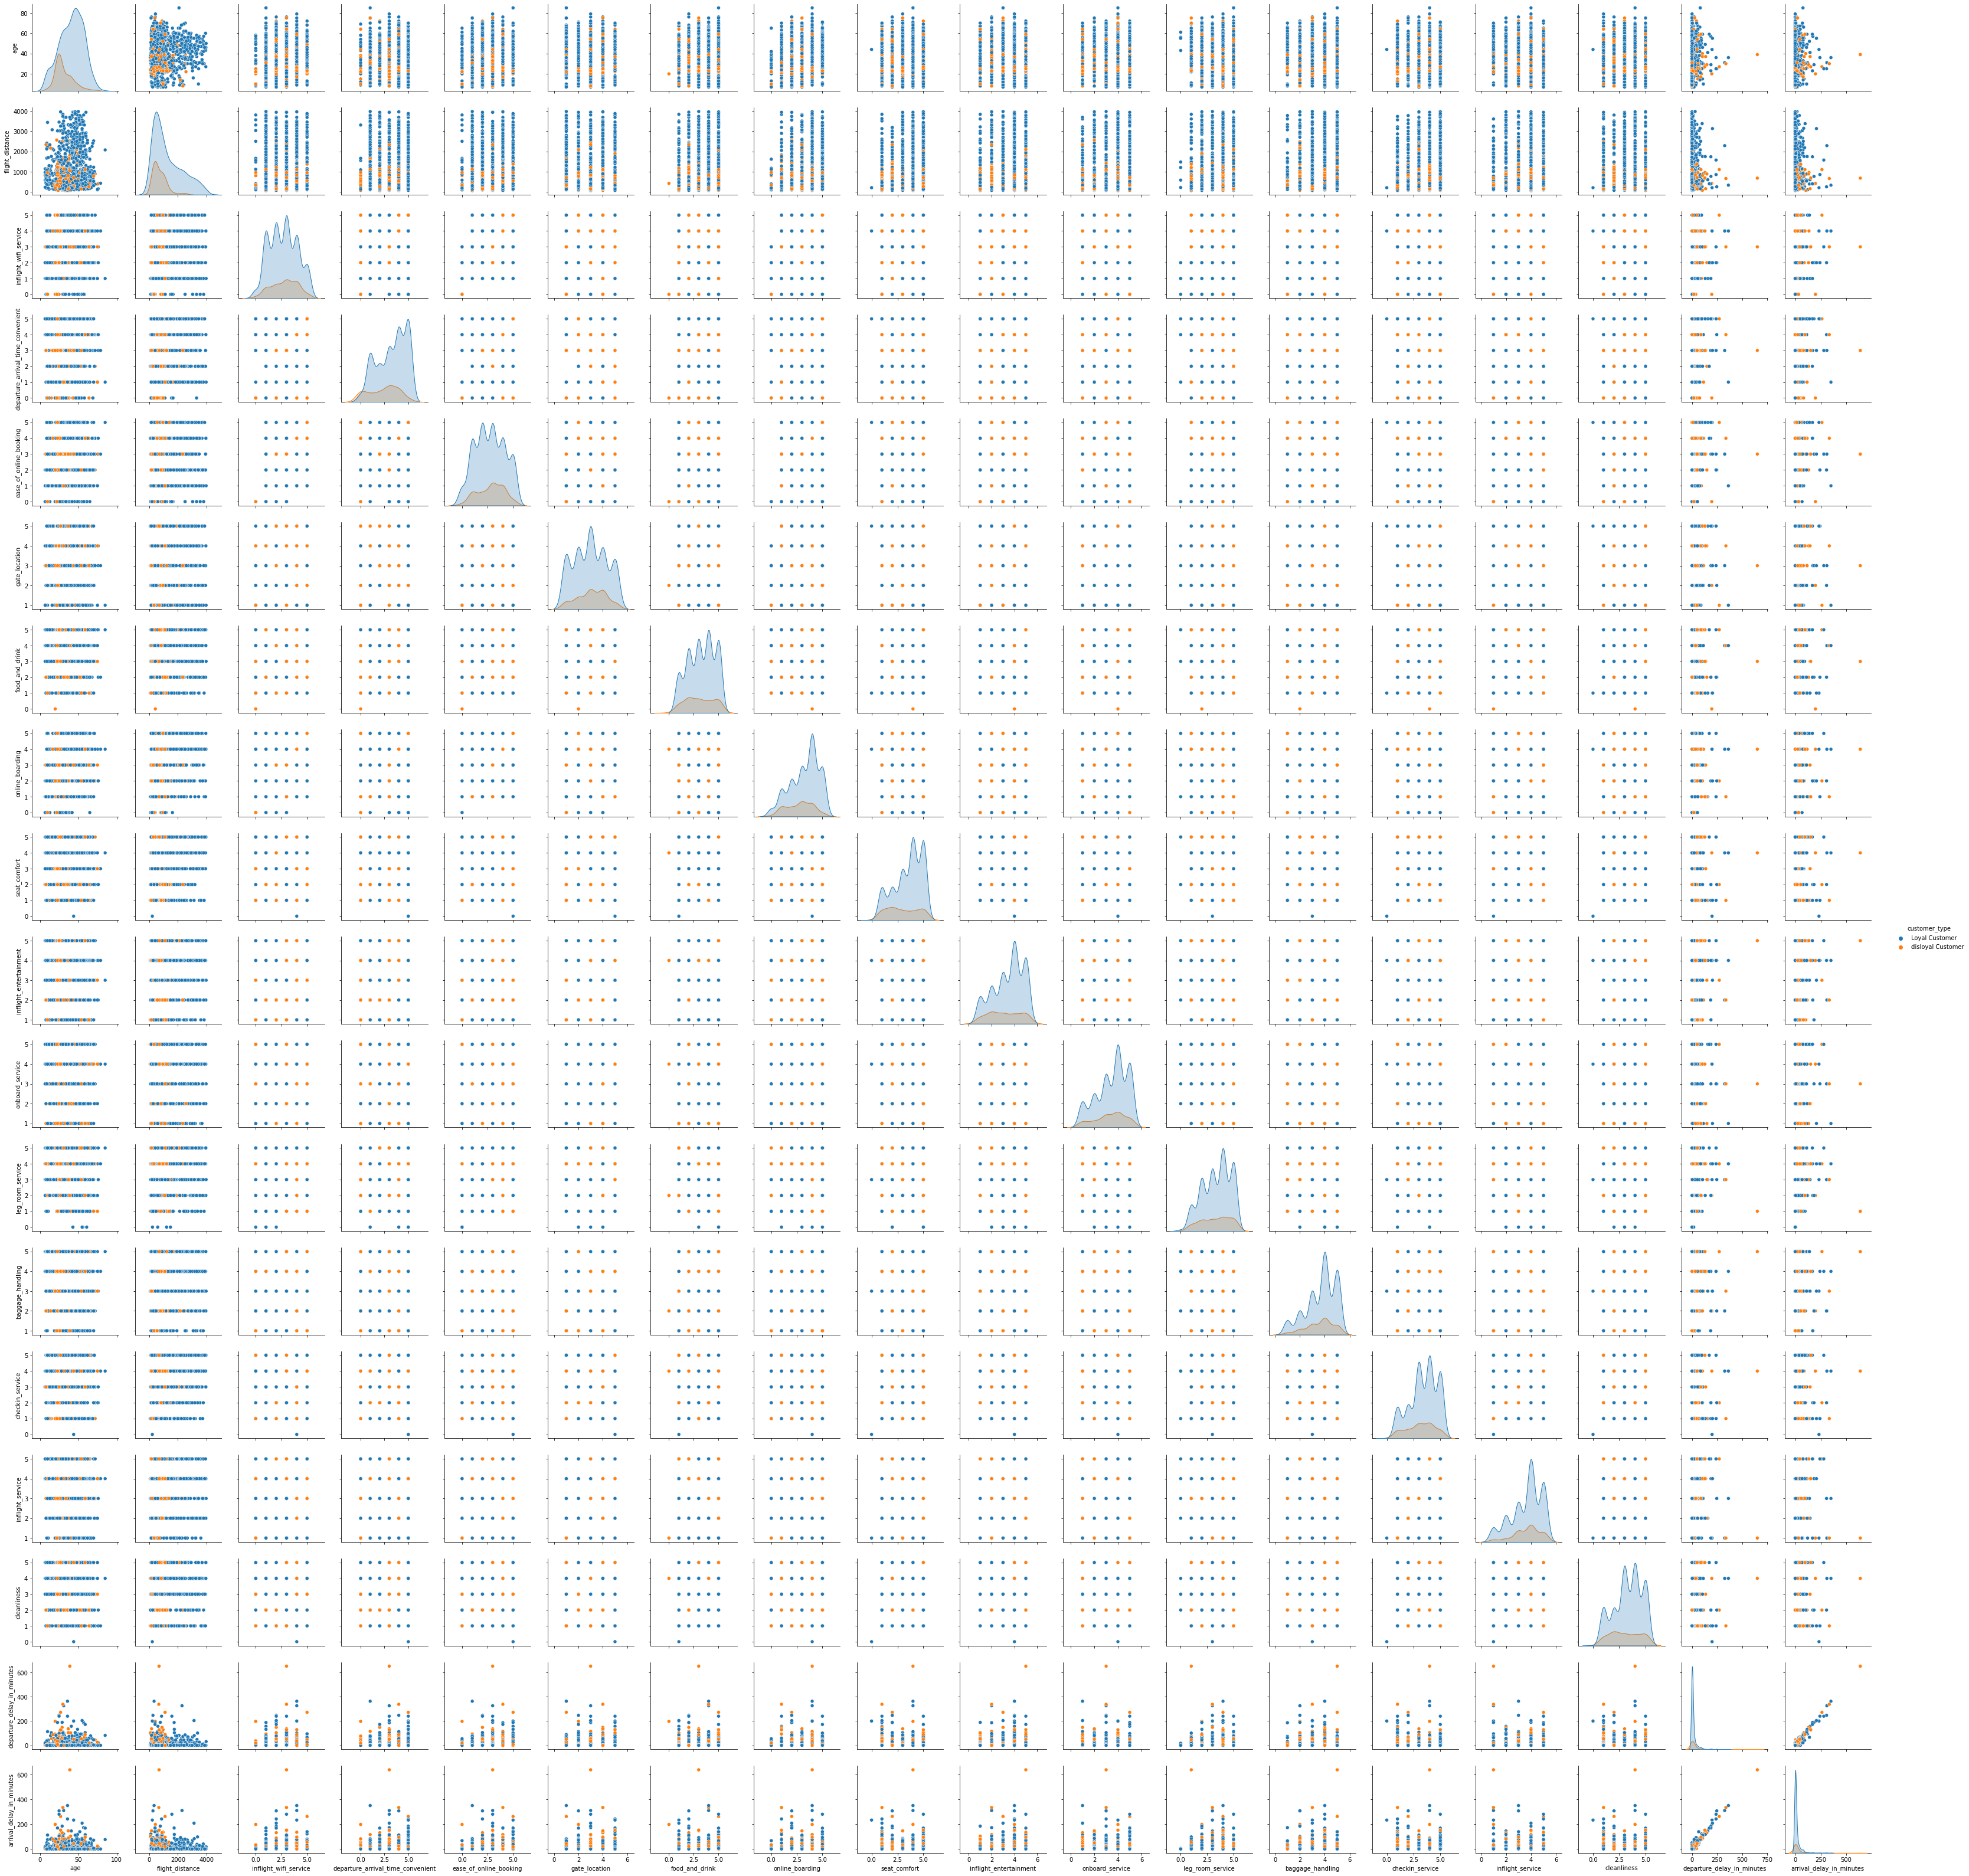

In [ ]:
sns.pairplot(data_raw.sample(1000), hue = 'customer_type')

Изобразим график демострирующий соотношение вариантов номинального признака:

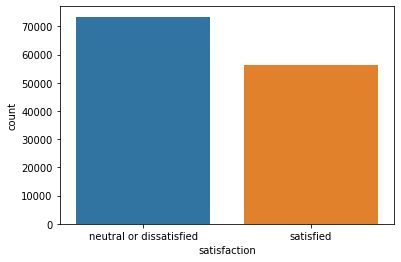

In [ ]:
sns.countplot(x = 'satisfaction', data = data_raw)

Вычислим матрицу корреляции для количественных признаков:

In [ ]:
corr_matrix = data_raw.corr()
corr_matrix

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
age,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
flight_distance,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
inflight_wifi_service,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
departure_arrival_time_convenient,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
ease_of_online_booking,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
gate_location,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
food_and_drink,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
online_boarding,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730
seat_comfort,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030521
inflight_entertainment,0.074947,0.130507,0.207802,-0.008380,0.046564,0.002741,0.623461,0.283922,0.611837,1.000000,0.418574,0.300397,0.379123,0.119554,0.406094,0.692511,-0.027012,-0.030230


Представим матрицу корреляции:

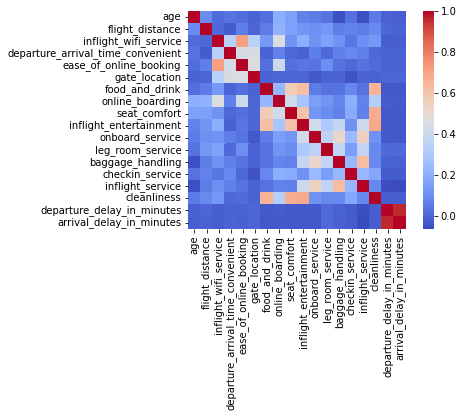

In [ ]:
sns.heatmap(corr_matrix, square = True, cmap = "coolwarm")
pass

Выведем коэффициенты корреляции, большие 0.5:

In [ ]:
corr_matrix.where(np.triu(np.abs(corr_matrix) > 0.5, k = 1)).stack().sort_values(ascending = False)

departure_delay_in_minutes  arrival_delay_in_minutes    0.965291
inflight_wifi_service       ease_of_online_booking      0.714807
inflight_entertainment      cleanliness                 0.692511
seat_comfort                cleanliness                 0.679613
food_and_drink              cleanliness                 0.658054
baggage_handling            inflight_service            0.629237
food_and_drink              inflight_entertainment      0.623461
seat_comfort                inflight_entertainment      0.611837
food_and_drink              seat_comfort                0.575846
onboard_service             inflight_service            0.551569
                            baggage_handling            0.520296
dtype: float64

## 4. Обработка пропущенных значений

Найдем количество пропущенных значений

In [ ]:
data_raw.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

Так как пропусков всего 393, то при и удалении не будет упущена важная информация

In [ ]:
data_raw = data_raw.dropna()

In [ ]:
data_raw.isnull().sum()

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

## 5. Обработка категориальных признаков

Проведём бинаризацию для всех бинарных категориальных признаков

In [ ]:
data_raw = data_raw.replace({'neutral or dissatisfied' : 0, 'satisfied' : 1})
data_raw['satisfaction'] = data_raw['satisfaction'].astype('int64')
data_raw = data_raw.replace({'disloyal Customer' : 0, 'Loyal Customer' : 1})
data_raw['customer_type'] = data_raw['customer_type'].astype('int64')
data_raw = data_raw.replace({'Personal Travel' : 0, 'Business travel' : 1})
data_raw['type_of_travel'] = data_raw['type_of_travel'].astype('int64')
data_raw = data_raw.replace({'Male' : 0, 'Female' : 1})
data_raw['Gender'] = data_raw['Gender'].astype('int64')

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129487 non-null  int64   
 1   customer_type                      129487 non-null  int64   
 2   age                                129487 non-null  int64   
 3   type_of_travel                     129487 non-null  int64   
 4   customer_class                     129487 non-null  category
 5   flight_distance                    129487 non-null  int64   
 6   inflight_wifi_service              129487 non-null  int64   
 7   departure_arrival_time_convenient  129487 non-null  int64   
 8   ease_of_online_booking             129487 non-null  int64   
 9   gate_location                      129487 non-null  int64   
 10  food_and_drink                     129487 non-null  int64   
 11  online_boarding           

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'if_binary', sparse = False)
enc.fit(data_raw[['customer_class']])

OneHotEncoder(drop='if_binary', sparse=False)

In [ ]:
dummies = pd.DataFrame(enc.transform(data_raw[['customer_class']]),
                      columns = enc.get_feature_names_out(), index=data_raw.index)
dummies

,customer_class_Business,customer_class_Eco,customer_class_Eco Plus
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
129875,1.0,0.0,0.0
129876,1.0,0.0,0.0
129877,0.0,1.0,0.0
129878,1.0,0.0,0.0


Добавляем фиктивные признаки
Удаляем небинарный категориальный признак

In [ ]:
data_raw = pd.concat((data_raw, dummies), axis=1).drop('customer_class', axis=1)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  int64  
 1   customer_type                      129487 non-null  int64  
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  int64  
 4   flight_distance                    129487 non-null  int64  
 5   inflight_wifi_service              129487 non-null  int64  
 6   departure_arrival_time_convenient  129487 non-null  int64  
 7   ease_of_online_booking             129487 non-null  int64  
 8   gate_location                      129487 non-null  int64  
 9   food_and_drink                     129487 non-null  int64  
 10  online_boarding                    129487 non-null  int64  
 11  seat_comfort                       1294

## 6. Проводим нормализацию

In [ ]:
data_raw = (data_raw - data_raw.min(axis=0))/ (data_raw.max(axis=0) - data_raw.min(axis=0))

In [ ]:
data_raw.head(15)

,Gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,customer_class_Business,customer_class_Eco,customer_class_Eco Plus
0,0.0,1.0,0.076923,0.0,0.086632,0.6,0.8,0.6,0.2,1.0,...,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0,0.0,0.0,1.0
1,0.0,0.0,0.230769,1.0,0.041195,0.6,0.4,0.6,0.6,0.2,...,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0,1.0,0.0,0.0
2,1.0,1.0,0.243590,1.0,0.224354,0.4,0.4,0.4,0.4,1.0,...,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0,1.0,0.0,0.0
3,1.0,1.0,0.230769,1.0,0.107229,0.4,1.0,1.0,1.0,0.4,...,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0,1.0,0.0,0.0
4,0.0,1.0,0.692308,1.0,0.036955,0.6,0.6,0.6,0.6,0.8,...,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0,1.0,0.0,0.0
5,1.0,1.0,0.243590,0.0,0.232027,0.6,0.8,0.4,0.2,0.2,...,0.75,0.8,0.8,0.2,0.000000,0.000000,0.0,0.0,1.0,0.0
6,0.0,1.0,0.512821,0.0,0.251414,0.4,0.8,0.4,0.6,0.4,...,0.75,0.6,1.0,0.4,0.005653,0.014520,0.0,0.0,1.0,0.0
7,1.0,1.0,0.576923,1.0,0.404685,0.8,0.6,0.8,0.8,1.0,...,1.00,0.8,1.0,0.8,0.002513,0.000000,1.0,1.0,0.0,0.0
8,1.0,1.0,0.435897,1.0,0.165994,0.2,0.4,0.4,0.4,0.8,...,0.00,0.8,0.2,0.4,0.000000,0.000000,0.0,1.0,0.0,0.0
9,0.0,0.0,0.166667,1.0,0.207997,0.6,0.6,0.6,0.8,0.4,...,0.75,0.8,0.6,0.4,0.000000,0.000000,0.0,0.0,1.0,0.0


## 7. Разбиваем данные на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data_raw['satisfaction']
x = data_raw.drop('satisfaction', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(97115, 24) (32372, 24) (97115,) (32372,)


## 8. Запуск классификатора к-ближайших соседей и вычисление ошибки

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

Для начала запустим классификатор к-ближайших соседей с 3 соседями

In [ ]:
knc_model = KNeighborsClassifier(n_neighbors=3)
knc_model.fit(x_train, y_train)

y_train_pred = knc_model.predict(x_train)
y_test_pred = knc_model.predict(x_test)

In [ ]:
print("точность на обучающей выборке: %.2f%%; и точность на тренировочной: %.2f%%"%(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("ошибка на обучающей выборке: %.2f%%; и ошибка на тренировочной: %.2f%%"%(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

точность на обучающей выборке: 96.03%; и точность на тренировочной: 92.74%
ошибка на обучающей выборке: 3.97%; и ошибка на тренировочной: 7.26%


Будем постепенно увеличивать количество соседей и следующий запуск классификатора будет с 5 соседями

In [ ]:
knc_model = KNeighborsClassifier(n_neighbors=5)
knc_model.fit(x_train, y_train)

y_train_pred = knc_model.predict(x_train)
y_test_pred = knc_model.predict(x_test)

In [ ]:
print("точность на обучающей выборке: %.2f%%; и точность на тренировочной: %.2f%%"%(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("ошибка на обучающей выборке: %.2f%%; и ошибка на тренировочной: %.2f%%"%(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

точность на обучающей выборке: 94.99%; и точность на тренировочной: 93.00%
ошибка на обучающей выборке: 5.01%; и ошибка на тренировочной: 7.00%


Проведём запуск с 10 соседями

In [ ]:
knc_model = KNeighborsClassifier(n_neighbors=10)
knc_model.fit(x_train, y_train)

y_train_pred = knc_model.predict(x_train)
y_test_pred = knc_model.predict(x_test)

In [ ]:
print("точность на обучающей выборке: %.2f%%; и точность на тренировочной: %.2f%%"%(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("ошибка на обучающей выборке: %.2f%%; и ошибка на тренировочной: %.2f%%"%(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

точность на обучающей выборке: 93.74%; и точность на тренировочной: 92.60%
ошибка на обучающей выборке: 6.26%; и ошибка на тренировочной: 7.40%


### Вывод
При увеличении гиперпараметра k точность обучающей выборки падает. Точность тренировочной выборки не претерпевает особых изменений и равна приблизительно 93%
\
Наилучший результат дотигается при выборе параметра k = 5.